## Analisis Variansi
### Distribusi F
#### Membandingkan dua variansi populasi
Distribusi F digunakan untuk menguji apakah kedua variansi populasinya sama. Ciri-ciri distribusi F:
1. Distribusinya kontinu dan berbentuk asimetris positif.
2. Nilainya tidak bisa negatif.
3. Terdapat serumpun distribusi F. Setiap kali derajat kebebasannya, baik pembilang dan penyebut berubah, distribusi baru akan terbentuk.

Asumsi pada distribusi F terhadap populasinya yakni populasi yang diambil sampelnya harus mengikuti distribusi normal. Terdapat pemilihan derajat kebebasan (dof) dalam distribusi F. Dalam menentukan nilai F tabel, kita perlu menggunakan derajat kebebasan untuk pembilang (yang di atas) dan penyebut (yang di bawah), biasanya variansi yang besar diletakkan di pembilang sehingga rasionya paling sedikit adalah 1.00. Formula untuk menghitung nilai F:

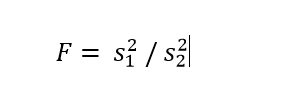<br>
di mana variansi pembilang merupakan variansi yang bernilai lebih besar daripada penyebutnya.

#### Case
Terdapat dua data sampel tentang rute tempuh. Pengamatan dilakukan untuk mencari perbedaan variansi waktu berkendara pada kedua rute tersebut dengan tingkat kepercayaan sebesar 0.1

    Hipotesis nol: var1 = var2<br>
    Hipotesis alternatif: var1 != var2<br>
    Tingkat kepercayaan: 0.1
    Tipe uji: Dua sisi
    Statistik uji: distribusi F

Pengerjaan:


In [15]:
#Import libraries
import pandas as pd
import numpy as np
from scipy import stats


#preprocess
data1 = [52, 67, 56, 45, 70, 54, 64]
data2 = [59, 60, 61, 51, 56, 63, 57, 65]
alpha = 1 - 0.1 / 2

#kalkulasi
var1 = np.var(data1, ddof = 1)
var2 = np.var(data2, ddof = 1)

if var1 > var2:
    f_hitung = var1 / var2
else:
    f_hitung = var2 / var1

nilai_kritis = stats.f.ppf(alpha, dfn = len(data1) - 1, dfd = len(data2) - 1)
p_value = 2 * (1 - stats.f.cdf(f_hitung, dfn = len(data1) - 1, dfd = len(data2) - 1))

#Kesimpulan
if f_hitung < nilai_kritis:
    print('Nilai f hitung  < nilai kritis, maka gagal tolak Hipotesis Nol')
else:
    print('Nilai f hitung > nilai kritis , maka menolak Hipotesis Nol')

print('Nilai f hitung sebesar', f_hitung)
print('Nilai kritis sebesar', nilai_kritis)
print('Nilai p sebesar', p_value)

Nilai f hitung > nilai kritis , maka menolak Hipotesis Nol
Nilai f hitung sebesar 4.226368159203981
Nilai kritis sebesar 3.865968853123844
Nilai p sebesar 0.08079321312946908


### ANOVA


1.9994770211238766